# Adding predictors

categorical variables and interaction variables can be used in linear regression

## Categorical variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#Make the data
#y are box office revenues, x1: advertising,x2: number of theaters, dummy: rated R
d1 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "x2": [2.036,2.919,1.707,1.505,2.232,2.910,2.795,1.46,3.288,1.838],
     "dummy": [1,1,0,1,1,0,0,1,0,0]
    }
data1 = pd.DataFrame(data = d1)

data1 = sm.add_constant(data1)
lm1 = sm.OLS(data1['y'],data1[['const', 'x1','x2','dummy']]).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     23.31
Date:                Fri, 10 Sep 2021   Prob (F-statistic):            0.00105
Time:                        21:30:54   Log-Likelihood:                -31.386
No. Observations:                  10   AIC:                             70.77
Df Residuals:                       6   BIC:                             71.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4045     10.382      1.195      0.2

C:\Users\goodsma\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\goodsma\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


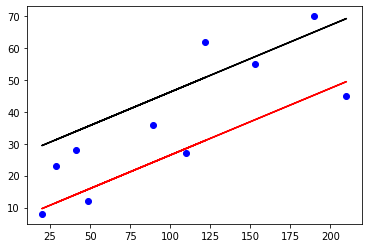

In [8]:
#Make the data
#y are box office revenues, x1: advertising, dummy: rated R  
d2 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "dummy": [1,1,0,1,1,0,0,1,0,0]
    }
data2 = pd.DataFrame(data = d2)

#Make an OLS
data2 = sm.add_constant(data2)
lm2 = sm.OLS(data2['y'],data2[['const','x1','dummy']]).fit()

#Make a plot with the two regression lines

#Make a scatter plot of the y and x1
x_plot = data2[['x1']]
y_plot = data2[['y']]
plt.scatter(x_plot,y_plot, color = 'blue')

#Add the regression line for non R-rated movies (black)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot, color = 'black')

#Add the regression line for R-rated movies (red)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot + lm2.params[2], color = 'red')

plt.show()

## Categorical variables with more than two levels

If there are more than two levels, we have to create additional dummy variables. In general, if a variable has c categories, than we create c-1 dummy variables, where each variable resolves to 1 if the the observation is equal to that category and 0 otherwise. So there will always be one less dummy variable than the number of categories. The category with no dummy variable is referred to as the 'reference class' or 'baseline'. This technique of transforming categorical variables to dummy variables is called one-hot encoding.

In [27]:
#Make the data
#y are box office revenues, x1: advertising, dummy: rated R  
d3 = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "dummy": ["Action","Drama","Adventure","Action","Comedy","Sci-Fi","Drama","Horror","Comedy","Action"]
    }
data3 = pd.DataFrame(data = d3)

#This function will create a dummy for every genre
dummies = pd.get_dummies(data3['dummy'])

#Delete one genre as reference category (e.g Horror)
dummies = dummies.drop('Horror', axis = 1)

#Add the dummies to the original data
final = pd.concat([data3, dummies], axis = 1)
final = final.drop('dummy', axis = 1)


## Interaction variables

In [30]:
#Use data2 but add the interaction effect
data4 = data2
data4['x1dummy'] = data4['x1']*data4['dummy']

#Make an OLS model
lm4 = sm.OLS(data4['y'],data4[['const','x1','dummy','x1dummy']]).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     23.76
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           0.000993
Time:                        22:26:17   Log-Likelihood:                -31.298
No. Observations:                  10   AIC:                             70.60
Df Residuals:                       6   BIC:                             71.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2593      8.062      2.017      0.0

C:\Users\goodsma\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We discover from the output that the intercept changes when the movie is R-rated (16.26 - 7.43). The slope also changes (0.29 - 0.12). This means that the effect of advertising spent on box office sales is higher for non R-rated movies. This is also clear when we make a plot of the regression lines:

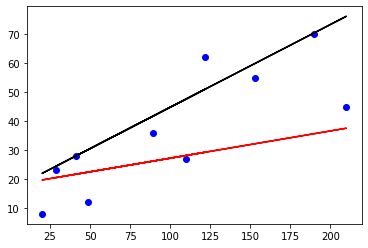

In [31]:
#Make a plot with the two regression lines
#Make a scatter plot of the y and x1

x_plot = data4[['x1']]
y_plot = data4[['y']]
plt.scatter(x_plot,y_plot, color ='blue')

#Add the regression line for non R-rated movies (black)
plt.plot(x_plot, lm4.params[0] + lm4.params[1]*x_plot, color = "black")

#Add the regression line for R-rated movies (red)
plt.plot(x_plot, lm2.params[0] + lm2.params[1]*x_plot + lm4.params[2] + lm4.params[3]*x_plot,color = "red")

plt.show()